In [2]:
import pandas as pd
import time
import numpy as np
import os
from collections import defaultdict
from sklearn.decomposition import PCA
from heavy_tail_observations import BothSideWeibullNoise, BothSideParetoNoise, BothSideFrechetNoise
from heavy_tail_lin_bandit import MENU, TOFU, SupHvyLinBandit
from heavy_tail_lin_bandit_emotion_model import MENU_e

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv("Induced Musical Emotion.csv")
data

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,400,pop,1,1,0,0,0,0,1,0,0,3,0,0,26,1,Russian
8403,400,pop,0,0,0,1,0,0,1,0,1,3,0,1,29,0,Russian
8404,400,pop,0,0,0,0,0,0,0,1,0,4,0,1,34,1,Polish
8405,400,pop,1,0,0,0,0,0,1,1,0,5,0,0,39,1,French


In [5]:
tag_log = pd.read_csv('tags_logi.csv')
tag_log

,Unnamed: 0,track id,genre,mood/theme---action,mood/theme---adventure,mood/theme---advertising,mood/theme---background,mood/theme---ballad,mood/theme---calm,mood/theme---children,...,mood/theme---slow,mood/theme---soft,mood/theme---soundscape,mood/theme---space,mood/theme---sport,mood/theme---summer,mood/theme---trailer,mood/theme---travel,mood/theme---upbeat,mood/theme---uplifting
0,0,1,classical,0.002376,0.009213,0.015566,0.019890,0.023473,0.024080,0.005286,...,0.025568,0.022343,0.016142,0.012046,0.001952,0.002078,0.000576,0.004674,0.002128,0.010974
1,0,2,classical,0.005639,0.012651,0.012793,0.012798,0.003338,0.015878,0.001955,...,0.008247,0.006880,0.026790,0.027412,0.001851,0.001136,0.001627,0.003926,0.001033,0.005437
2,0,3,classical,0.009581,0.010186,0.011635,0.011774,0.002394,0.003691,0.001225,...,0.003500,0.002091,0.011797,0.012227,0.017147,0.002807,0.001697,0.002689,0.007608,0.012187
3,0,4,classical,0.001265,0.005613,0.013116,0.026640,0.005549,0.013257,0.004866,...,0.001037,0.013048,0.003450,0.003030,0.000987,0.000811,0.000232,0.002147,0.001003,0.008989
4,0,5,classical,0.006248,0.011197,0.012326,0.018698,0.006294,0.012258,0.002509,...,0.007521,0.008100,0.012973,0.009666,0.001405,0.000314,0.001883,0.002778,0.000643,0.005982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,396,pop,0.003901,0.014806,0.029541,0.048577,0.030159,0.028118,0.010944,...,0.009544,0.031977,0.010732,0.007031,0.002800,0.001677,0.001044,0.006551,0.005530,0.026672
396,0,397,pop,0.002580,0.004813,0.007780,0.007547,0.000757,0.003163,0.000708,...,0.004606,0.001559,0.006756,0.007236,0.004021,0.000855,0.000477,0.001305,0.001221,0.004746
397,0,398,pop,0.002637,0.009449,0.028664,0.015163,0.001700,0.003020,0.007568,...,0.001044,0.001939,0.002037,0.002112,0.021801,0.008542,0.000405,0.001731,0.043691,0.063805
398,0,399,pop,0.004715,0.008978,0.009029,0.017335,0.004001,0.017538,0.000733,...,0.005790,0.010386,0.035687,0.029996,0.001294,0.001170,0.001263,0.005052,0.000963,0.004665


In [4]:
data.mode()

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,207,classical,0,0,0,0,0,0,0,0,0,4,0,0,25,0,English


In [ ]:
d = data[data['track id']==102]
d

In [3]:
import torch
import torch.nn as nn
from model import CNN
import numpy as np
device = torch.device('cuda:0')
model = CNN(56).to(device=device)
model_state_dict = torch.load('mood_models/best_model.pth')
model.load_state_dict(model_state_dict)
model.dense

,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked
amazement,1.000000,-0.034695,0.002308,-0.099185,-0.072947,0.046472,0.155424,-0.114553,-0.146969,0.048178,0.108304,-0.131652
solemnity,-0.034695,1.000000,-0.072575,-0.059082,-0.012520,0.012750,-0.098162,-0.040608,-0.034689,0.021121,0.084550,-0.114655
tenderness,0.002308,-0.072575,1.000000,0.087216,0.140270,-0.156100,-0.091257,-0.195904,-0.023642,0.012068,0.121795,-0.119279
nostalgia,-0.099185,-0.059082,0.087216,1.000000,0.057075,-0.155181,-0.173886,-0.190797,0.118118,-0.019525,0.017898,-0.081364
calmness,-0.072947,-0.012520,0.140270,0.057075,1.000000,-0.212538,-0.193518,-0.281527,-0.069646,-0.003863,0.104564,-0.126638
power,0.046472,0.012750,-0.156100,-0.155181,-0.212538,1.000000,0.128937,0.038252,-0.121927,0.036659,0.073678,-0.063650
joyful_activation,0.155424,-0.098162,-0.091257,-0.173886,-0.193518,0.128937,1.000000,-0.115181,-0.228275,0.016420,0.131553,-0.138436
tension,-0.114553,-0.040608,-0.195904,-0.190797,-0.281527,0.038252,-0.115181,1.000000,0.010221,-0.018809,-0.211250,0.269107
sadness,-0.146969,-0.034689,-0.023642,0.118118,-0.069646,-0.121927,-0.228275,0.010221,1.000000,-0.052243,-0.093412,0.085616
mood,0.048178,0.021121,0.012068,-0.019525,-0.003863,0.036659,0.016420,-0.018809,-0.052243,1.000000,0.054016,-0.028261


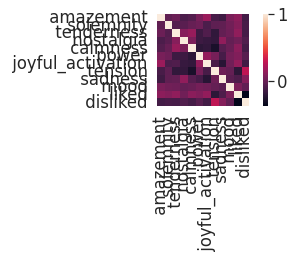

In [4]:
corr.values
col_names = col
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values, 
            cbar=True, 
            square=True, 
            fmt='.2f',
            annot_kws={'size': 15}, 
            yticklabels=col_names, 
            xticklabels=col_names) 

plt.tight_layout()
plt.show()

In [5]:
sns.set(style='whitegrid')
sns.pairplot(data)
plt.show()

KeyboardInterrupt: 

In [9]:
print(len(data[data[' mood']==1]))
print(len(data[data[' mood']==2]))
print(len(data[data[' mood']==3]))
print(len(data[data[' mood']==4]))
print(len(data[data[' mood']==5]))

343
833
2776
3238
1215


In [5]:
data[data[' age'] == 25]

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
32,1,classical,0,0,0,0,0,0,0,0,1,4,0,1,25,1,English
74,2,classical,0,0,0,1,0,0,0,0,1,4,1,0,25,1,English
81,2,classical,0,0,1,0,0,0,0,0,0,4,1,0,25,0,Russian
83,2,classical,0,0,0,0,1,0,0,0,0,5,0,0,25,1,Russian
112,3,classical,0,1,0,1,0,0,0,0,0,4,0,0,25,0,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,390,pop,1,0,0,1,0,0,0,0,0,3,0,1,25,1,Russian
8291,391,pop,1,0,0,0,0,0,1,0,0,4,0,0,25,1,Russian
8337,395,pop,1,0,0,0,0,0,1,0,0,4,1,0,25,1,English
8352,396,pop,0,0,0,0,0,0,0,1,0,4,0,1,25,1,English


In [3]:
data = data[:8405]
df = data.drop(['track id', ' genre', ' mood', ' liked', ' disliked', ' age', ' gender', ' mother tongue'], axis=1)
df

,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness
0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8400,0,0,0,0,0,0,0,0,1
8401,0,0,0,0,0,0,0,1,0
8402,1,1,0,0,0,0,1,0,0
8403,0,0,0,1,0,0,1,0,1


In [7]:
np.mean(data[' liked'])

0.3915526472337894

In [8]:
np.var(data[' liked'])

0.2382391716780011

In [4]:
data[data[' disliked'] == 1][' liked']=-1
mood = data[' mood'].to_numpy()
mood = (mood - 1) / 4

/tmp/ipykernel_1212321/1524834800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[' disliked'] == 1][' liked']=-1


In [5]:
y = data[' liked'].to_numpy()
X = df.to_numpy()
dim = X.shape[1]
total_samples = len(y)

T = 1681
K = int(total_samples/T)

p = 1.5
S = 1.

D = np.reshape(X, (T,K,dim))
R = np.reshape(y, (T,K))

In [6]:
get_mean = lambda x, y: R[y]
get_observation = lambda x, y, z: R[y][z]

In [9]:
error_list, theta_star = MENU(D, get_mean, get_observation, S=S, lamb=1., delta=0.01, p=p, c=1.)
# error_list, theta_star = TOFU(D, get_mean, get_observation, S=S, lamb=1., delta=0.01, p=p, b=1.)
# error_list, pro_estimator = SupHvyLinBandit(D, get_mean, get_observation, method="proof", S=S, lamb=1., delta=0.001, nu = 1e-4, p=p)
# error_list, btc_estimator = SupHvyLinBandit(D, get_mean, get_observation, method="btc", S=S, lamb=1., delta=0.001, nu = 1., p=p)
# error_list, bmm_estimator = SupHvyLinBandit(D, get_mean, get_observation, method="bmm", S=S, lamb=1., delta=0.001, nu = 1., p=p)

array([0. , 0. , 0. , ..., 0.5, 0.5, 0.5])

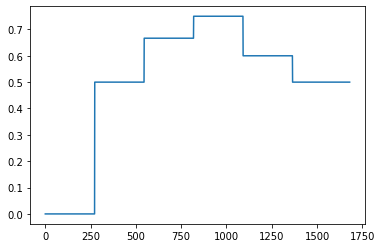

In [10]:
plt.plot(error_list)
error_list

In [7]:
error_list, theta_star = MENU_e(D, mood, get_mean, get_observation, S=S, lamb=1., delta=0.01, p=p, c=1.)

array([0. , 0. , 0. , ..., 0.5, 0.5, 0.5])

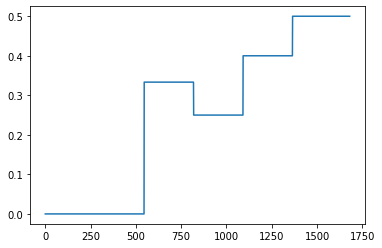

In [8]:
plt.plot(error_list)
error_list